*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to an image classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

So, today, our focus is image classification with CNNs. <br>
We will also learn how to do image classification via "transfer learning", which is using pre-trained neural networks.<br> 
Modern __computer vision__ approaches rely heavily on convolutions <br>
for both `dimensionality reduction and feature extraction`. <br>
Before we dive into convolutions, let's consider some of the common computer vision applications: 

* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* [Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation)



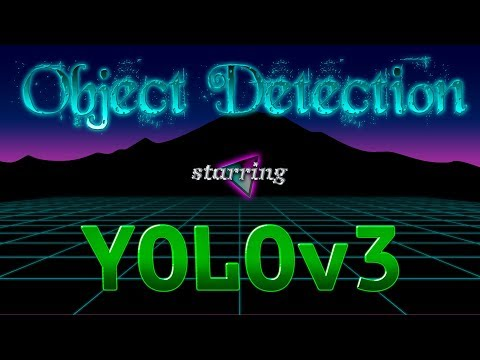

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# 1. Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview
Just like perceptrons and Fully Connected neural networks, CNNs are also inspired by biology - specifically, the receptive fields of the visual cortex.

[Hubel and Weisel Nobel Prize 1981](https://www.nobelprize.org/prizes/medicine/1981/summary/)<br>
In the brain, the neurons in the visual cortex **specialize** to be receptive to certain shapes, colors, orientations, and other common visual features. 

Our visual system transforms raw visual input (light from a scene), and sends it to neurons in the brain that evolved to specialize in responding to certain visual stimuli.

CNNs (Convolutional Neural Networks) were invented to imitate this approach. A convolution is a mathematical operation that involves passing a filter array with a small receptive field over an image and computing a feature map based on small patches of the image. and Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input. 

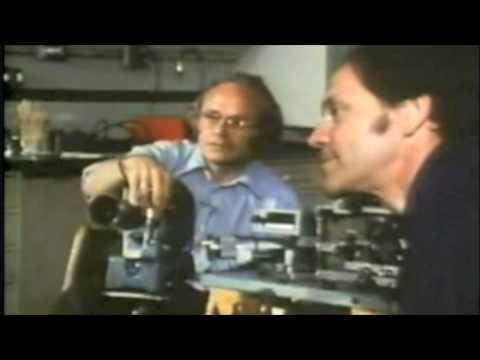

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

## Follow Along

What are the operations of Convolution and Pooling?

### Convolution

A convolution is a transformation of an image to produce a feature map.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

In [1]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity
from sklearn.datasets import load_sample_image

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
print(f'RGB image shape: {austen.shape}')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
print(f'Grayscale image shape: {austen_grayscale.shape}')

RGB image shape: (400, 400, 3)
Grayscale image shape: (400, 400)


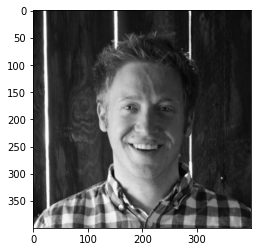

In [2]:
plt.imshow(austen_grayscale, cmap="gray");

In [3]:
import numpy as np
import scipy.ndimage as nd

# this a convolutional filter (i.e. a weight matrix) that enhances horizontal features in an image

# CHALLENGE: try to convince yourself that you understand how these matrices are able to do what they do  
horizontal_edge_convolution = np.array([[ 1, 1, 1, 1],
                                        [ 0, 0, 0, 0],
                                        [ 0, 0, 0, 0],
                                        [-1,-1,-1,-1]])

# this a convolutional filter (i.e. a weight matrix) that enhances the vertical features in an image 
vertical_edge_convolution = np.array([[  1, 0, 0, -1],
                                     [   1, 0, 0, -1],
                                     [   1, 0, 0, -1],
                                     [   1, 0, 0, -1]])
                                    

# this a convolutional filter (i.e. a weight matrix) that enhances diagonal features in an image 
diag_edge_convolution = np.array([[  1,-1, 1,-1],
                                  [ -1, 1,-1, 1],
                                  [  1,-1, 1,-1],
                                  [ -1, 1,-1, 1]])

# Doc for nd.convolve: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
austen_edges_vert = nd.convolve(austen_grayscale, vertical_edge_convolution)
austen_edges_horz = nd.convolve(austen_grayscale, horizontal_edge_convolution)
austen_edges_diag = nd.convolve(austen_grayscale, diag_edge_convolution)

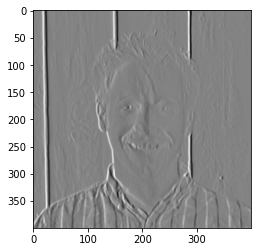

In [4]:
plt.imshow(austen_edges_vert, cmap="gray");

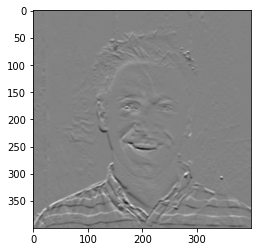

In [5]:
plt.imshow(austen_edges_horz, cmap="gray");

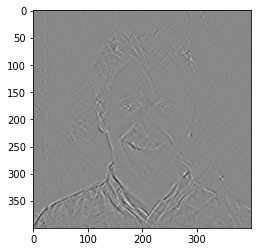

In [6]:
plt.imshow(austen_edges_diag, cmap="gray");

### Exercise: apply the vertical and horizontal convolution filters <br>
to the `china.jpg` image or any `.jpg` image you want to use!

In [ ]:
china = load_sample_image("china.jpg")
china.shape

In [ ]:
## YOUR CODE HERE

------

### Convolutional Neurons 

In [`scipy.ndimage.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html), a one-dimensional convolution calculation is given by<br><br>
$$C_i = \sum_j{W_j X_{i+k-j} }$$ <br>
where $C_i$ is the value of the convolution at the $ith$ position. <br>
A two-dimensional convolution can be expressed by a similar formula.

Don't worry about the various indices: focus on the general structure of the equation. 

If the sum doesn't look familar to you yet, we can recast it as a dot product:

$$\mathbf{W} \cdot \mathbf{X}$$<br>
where $W$ is a $n\times n$ convolution filter and $X$ is an  underlying $n\times n$ region of the image we are applying the convolution to. <br><br>
This matrix dot product is a scalar, which you recognize as the computation for a pixel value  in the activation map.<br><br>
If for example, $n=2$,  then the activation pixel value is the sum of the four terms<br><br>

$$\mathbf{W} \cdot \mathbf{X} = W_{11} X_{11} + W_{12} X_{12}+ W_{22} X_{22} + W_{21} X_{21}$$<br>

In a convolution, one can add a bias term...<br><br>

$$\mathbf{W} \cdot \mathbf{X} + b$$<br>

And optionally, an activation function...<br><br>

$$\sigma(\mathbf{W} \cdot \mathbf{X} + b)$$<br>

So the output would look like this:<br><br>

$$y~=~\sigma(\mathbf{W} \cdot \mathbf{X} + b),$$<br><br>
Where $y$ is the value of a pixel in the activation map

The convolutional layer is composed of neurons (perceptrons) that specialize in processing visual information.

Now `scipy.ndimage.convolve` doesn't use an activation function or a bias term, but the convolutional layers that we'll be using in our CNNs do have a bias term and (optionally) an activation function. 

Do you see how ubiquitous that perceptron equation is? This is why we took the time to learn it in Sprint 2.

_To recap: the perceptron is the fundamental building block of a neural network_

### Feature Maps 

![](https://www.researchgate.net/profile/Mehdi-Cherti/publication/326412238/figure/fig29/AS:648874402271233@1531715121461/Example-of-feature-hierarchy-learned-by-a-deep-learning-model-on-faces-from-Lee-et-al.png)


The matrix that is created by a convolution is a called **Feature Map**. 

Feature maps are matrices that contain the output of a convolutional layer. 

Each convolutional layer is performing both dimensionality reduction and feature engineering. 

In order to understand the above images, let's focus on the feature engineering part. 

**1st layer's job** is to detect lines/edges from the raw pixel values, then pass those lines (features that were created by the convolutional neurons) to the next layer. 

**2nd layer's job** is to accept the lines and combine them (like lego blocks) to create new features with them, this time parts of an object. Those parts are then passed forward to the next convolutional layer. 

**3rd layer's job** is to accept the parts of an object and put them together (like lego blocks) and create even more complex features, like a person's face, a car, a building, an animal, any object contained in the dataset. 


References: 

[Feature Visualization How neural networks build up their understanding of images](https://distill.pub/2017/feature-visualization/)

[Visualizing and Understanding Convolutional Networks, by
Matthew D Zeiler, Rob Fergus](https://arxiv.org/abs/1311.2901)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285) From the abstract: "The guide clarifies the relationship between various properties (input shape, kernel shape, zero padding, strides and output shape) of convolutional, pooling and transposed convolutional layers, as well as the relationship between convolutional and transposed convolutional layers. Relationships are derived for various cases, and are illustrated in order to make them intuitive. "

------

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps.<br>
We get smaller and smaller feature sets by repeatedly apply convolutions followed by pooling layers. 

Let's take a look at a simple example using Austen's photo.

(400, 400)


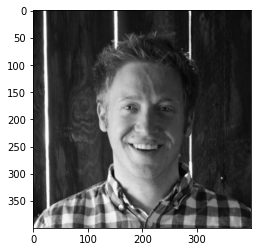

In [7]:
plt.imshow(austen_grayscale, cmap="gray");
print(austen_grayscale.shape)

(200, 200)


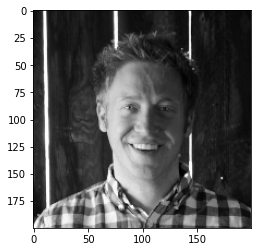

In [8]:
from skimage.measure import block_reduce

reduced1 = block_reduce(austen_grayscale, (2,2), np.max)
plt.imshow(reduced1, cmap="gray");
print(reduced1.shape)

With MaxPooling of (2,2) we are able to reduce the size of our image 
by a factor of 4 with out noticably losing any important information. <br>
We still preserve the light contrast and the lines, and much of the detail on Austen's face

(100, 100)


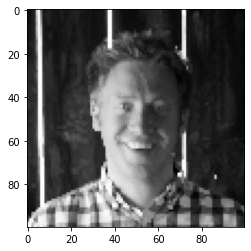

In [9]:
reduced2 = block_reduce(reduced1, (2,2), np.max)
plt.imshow(reduced2, cmap="gray");
print(reduced2.shape)

(50, 50)


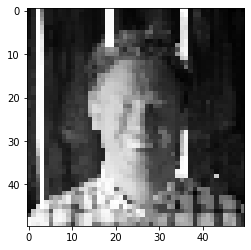

In [10]:
reduced3 = block_reduce(reduced2, (2,2), np.max)
plt.imshow(reduced3, cmap="gray");
print(reduced3.shape)

(25, 25)


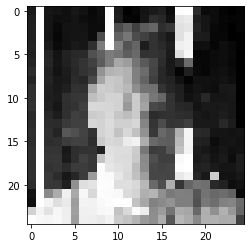

In [11]:
reduced4 = block_reduce(reduced3, (2,2), np.max)
plt.imshow(reduced4, cmap="gray");
print(reduced4.shape)

The motivation behind the pooling layer is to reduce the number 
of trainable parameters by downsampling, <br>
while still preserving essential features of the image.

## Challenge

You will be expected to be able to describe convolution. 

---------

# 2. CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



#### [Stanford CS231 Convolutions](https://cs231n.github.io/convolutional-networks/) has some great material, including an enlightening animation!

------
# Build a CNN
For this exercise we'll use the [CIFAR10 small images classification dataset](https://keras.io/api/datasets/cifar10/), available in Keras.<br>
CIFAR10 is a set of 50,000 training and 10,000 test images. <br>
The images are in 10 classes, as with our MNIST and Fashion MNIST data sets<br>
What's different is these are color images; each example is a tensor of shape 32x32x3 pixels.<br>
You can think of each example as composed of three 32x32 images, one each in Red, Green and Blue (RGB) filters.

Reference: [Interactive CIFAR model built in JavaScript](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html) built by Andrej Karpathy.

In [12]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

### First let's load and explore the data

In [13]:
# load in our color images
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [14]:
# Normalize pixel values between 0 and 1
# this is done by dividing by the max pixel value 
max_pixel_value = train_images[0].max()
print(max_pixel_value)
train_images, test_images = train_images / max_pixel_value, test_images / max_pixel_value

255


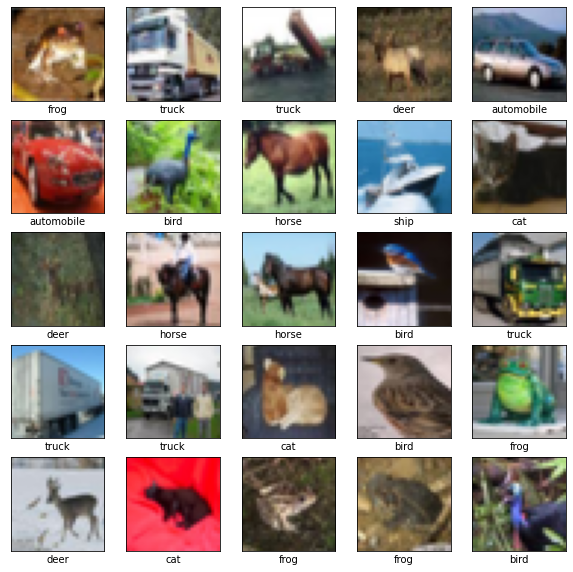

In [15]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Tensors

![](https://miro.medium.com/max/891/0*jGB1CGQ9HdeUwlgB)


In [16]:
# this is a Rank 3 tensor 
# another way of thinking about this array is that it is 3-D stack of 2-D tensors
train_images[0].shape

(32, 32, 3)

In [17]:
# this is a Rank 4 tensor 
# think of this array as a stack of 3D images
train_images.shape

(50000, 32, 32, 3)

_____

### Build a CNN Model to process CIFAR10 images, using Keras

In [18]:
# this is the number of labels that we want to predict in the output layer
n_features = len(np.unique(train_labels))
n_features

10

In [19]:
# build model layer by layer

###BEGIN SOLUTION

# keras calls them filters and kernels, we call them weight matrices 
# weight matrices have cell values 
# weight matrix cell values are randomly initialized 
# and get updated during Gradient Descent just like weights in the FCFF network 
n_weight_matrices = 32

# specify the window size (i.e. 3 cell high and 3 cell wide)
# convolution kernel, convolution filter, weight matrix
weight_matrix_size = (3,3)

# output of the convolutions between the weight matrices and the image pixels 
# will be passed into the activation function (if activate function isn't None)
# ie. y = f(w*x + b)
act_func = 'relu'

# dim of the image: 32 cell high, 32 cell wide, and 3 channels (one for Red, one for Blue, and one for Green)
# this means our images are not matrices, they are tensors 
image_dim = (32,32,3)

pool_size = (2,2)

model = Sequential()

### Note about the weights in the convolutional layers ####
# during training, the weights in the weight matrix (i.e. the windows used for convolutions) are updated 
# these weights are responsible for identifying important features in the images (i.e. feature engineering)
# they must be tuned so that each convolutional layer is able to identify features (i.e. feature engineering)
# each layer creates features, then pass those features to the next layer so that the next layer can use those features to create new features (hieratical features!)


# 1st conv layer 
model.add(Conv2D(n_weight_matrices, 
                 weight_matrix_size, 
                 activation=act_func, 
                 input_shape=image_dim))

# 1st pooling layer 
model.add(MaxPooling2D(pool_size))

# 2nd conv layer 
model.add(Conv2D(128,
                 weight_matrix_size, 
                 activation=act_func))

# 2nd pooling layer 
model.add(MaxPooling2D(pool_size))

# 3rd conv layer 
model.add(Conv2D(64, 
                 weight_matrix_size, 
                 activation=act_func))

# not adding a 3rd pooling layer becaue the size of the image at this point
# is already very small, i.e. (4,4)

# flatten the image matrix into a row vector 
model.add(Flatten())

# hidden layer in FCFF portion of model 
model.add(Dense(60, activation=act_func))

# hidden layer in FCFF portion of model 
model.add(Dense(10, activation="softmax"))

model.summary()
###END SOLUTION

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Questions about the CNN we just built

Q1: Can you explain the Output Shape of each of these layers?<br>
* `conv2d_9`
* `max_pooling2d_6`
* `conv2d_10`
* `max_pooling2d_7`
* `conv2d_11` 
* `flatten_3` 

Q2: Can you explain the number of parameters in each layer?<br>
Hint: for `conv2d_9` there are $32$ $(3\times3)$ convolution filters for each of the $3$ (RGB) input images. You can think of these convolution filters as a stack of $3\times3\times3$ tensors, each of which is applied to the $32\times32\times3$ input image. There are a total of $32\times3\times3\times3$ = $864$ weights. And each of these $3\times3\times3$ convolution filters also has an associated bias, so there are a total of $864 + 32 = 896$ parameters.

Q3: How could you make the activation map produced by each convolution the same size as its input, instead of $2$ pixels smaller in each dimension? Try it. Does this improve the model's performance?

Q4: Why does the last `Dense` layer have 10 neurons?

Q5: Why does the last `Dense` layer have a different activation function than the previous `Dense` layer?

In [20]:
# import Adam in format that allows tuning the learning rate
from tensorflow.keras.optimizers import Adam
# specify learning rate and optimizer
opt = Adam(learning_rate=0.001)


In [21]:
# Compile Model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
%%time
# Fit Model
model.fit(train_images, 
          train_labels, 
          epochs=10, batch_size=128,
          validation_data=(test_images, test_labels)
          )

Epoch 1/10
391/391 [==============================] - 11s 7ms/step - loss: 1.6404 - accuracy: 0.3994 - val_loss: 1.3517 - val_accuracy: 0.5154
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.2772 - accuracy: 0.5443 - val_loss: 1.2524 - val_accuracy: 0.5572
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1238 - accuracy: 0.6023 - val_loss: 1.0884 - val_accuracy: 0.6195
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.0124 - accuracy: 0.6432 - val_loss: 0.9707 - val_accuracy: 0.6637
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9402 - accuracy: 0.6701 - val_loss: 0.9735 - val_accuracy: 0.6617
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 0.8782 - accuracy: 0.6939 - val_loss: 0.9043 - val_accuracy: 0.6891
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.8248 - accuracy: 0.7132 - val_loss: 0.8820 - val_accuracy: 0.7002
Epoch

In [23]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.8617 - accuracy: 0.7090 - 676ms/epoch - 2ms/step


## Challenge

You will apply CNNs to a classification task in the module project.

-------
### Digression

We do have the option of taking a look at the weight values (from the convolutional layers and FCFF layers). The input data (the images) are normalized to values between 0 and 1. Our lesson on Gradient Descent (from Sprint 2) taught us that normalized data should have 2 observable effects: 

- The weight values should all be about the same size (i.e. on the same order of magnitude). 
- The model performance should be better when using normlized data than on non-normalized data set. 

A fun experiment you should consider running at some other time would be to see if these observations are reversed and to what extent if the input data is not normalized. 

In [ ]:

# model has a bunch of cool attributes that you can explore
# one such attribute is the tuned weights between each layer 
weights = model.get_weights()

# these are the trained/learned weights of our model when we NORMALIZE our input data
# EXPERIMENT: what would the weight values be if we DIDN'T NORMALIZE our input data?
for w_mat in weights:
    print (w_mat.min(), w_mat.max())

-0.25774783 0.21504456
-0.12392041 0.18555172
-0.5662546 0.4815419
-0.1005967 0.17326677
-0.5126974 0.45834744
-0.064444646 0.19123086
-0.526945 0.38244396
-0.10797762 0.1571474
-0.5354263 0.589509
-0.10681071 0.14092526


-------

# 3. Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### [TensorFlow Hub](https://www.tensorflow.org/hub/) 
is a library for reusable machine learning models, that lets you quickly take advantage of models that were trained with thousands of GPU hours. 

This makes possible [**transfer learning**](https://keras.io/guides/transfer_learning/) - reusing a trained model's weights and biases as your model's initial values, then continuing to train the model with your own data to arrive at the best values for your task. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better. It works because a model that is trained well on a large number of images has already learned the basic components common to these images. So if the images in your own data set are not too different than the ones in the original large training data, the parametes from the trained model will work reasonably well on your images "right out of the box". Adopting the trained weights and biases as your intial values, then continuing to train the model can often significantly improve the performance. Note that transfer learning requires that your model architecture is identical to that of the original trained model!



TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. 

We'll focus on a workhorse image classifier: **ResNet50.**

Here's a link that lists all the pre-trained models in the [**Keras Library**](https://keras.io/api/applications/)

The ImageNet competition started in 2010 and has a labeled dataset consisting of 1.2 million images, each a member of one of 1000 classes. This competition has played a key role in spurring theoretical advances in Computer Vision. [**paperswithcode**](https://paperswithcode.com/) has an interesting webpage [**Image Classification on ImageNet**](https://paperswithcode.com/sota/image-classification-on-imagenet) that keeps track of the evolution of the best-performing image classification architectures over the last 10 years or so. <br>


Note the recent trend that [**Transformer**](https://jalammar.github.io/illustrated-transformer/)-based architectures -- which were developed for use in  Natural Language Processing -- are now performing as well as state of the art CNNs on Computer Vision problems! If you are interested in learning about Transformers, see the [**Hugging Face Transformers Course**](https://huggingface.co/course/chapter1).

## Using a pre-trained model for image classification (Follow Along)
We are going to classify images using a pretrained `ResNet50` model right "out of the box".

In [33]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [35]:
def process_img_path(img_path):
    """
    Using tensorflow per-build image processor. 

    Returns processed image. 
    """
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

# Decide whether any of the three most likely image classes is "banana"
def img_contains_banana(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('x.shape after preprocess_input ',x.shape)
    
    # instantiate pretrained ResNet50 model
    model = ResNet50(weights='imagenet')
    
    # get classification of image
    features = model.predict(x)
    print('shape of predictions ',features.shape)
    
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=3)[0]
 
    # return True if 'banana' is among the top 3 predictions
    detected_banana = False
    for entry in results:
        print(entry)
        if entry[1] == 'banana':
            detected_banana = True
    return detected_banana

### Let's have a look at the ResNet50 model architecture
We imported the ResNet50 model, including the $25,583,592$ parameters (weights and biases) that were trained using the ImageNet data set!

In [36]:
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Now let's use our `ResNet50` model to classify a few images and see whether it thinks they are a banana. <br>
Our `img_contains_banana` function returns `True` if any of the top 3 predicted classes is `banana`.

In [37]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

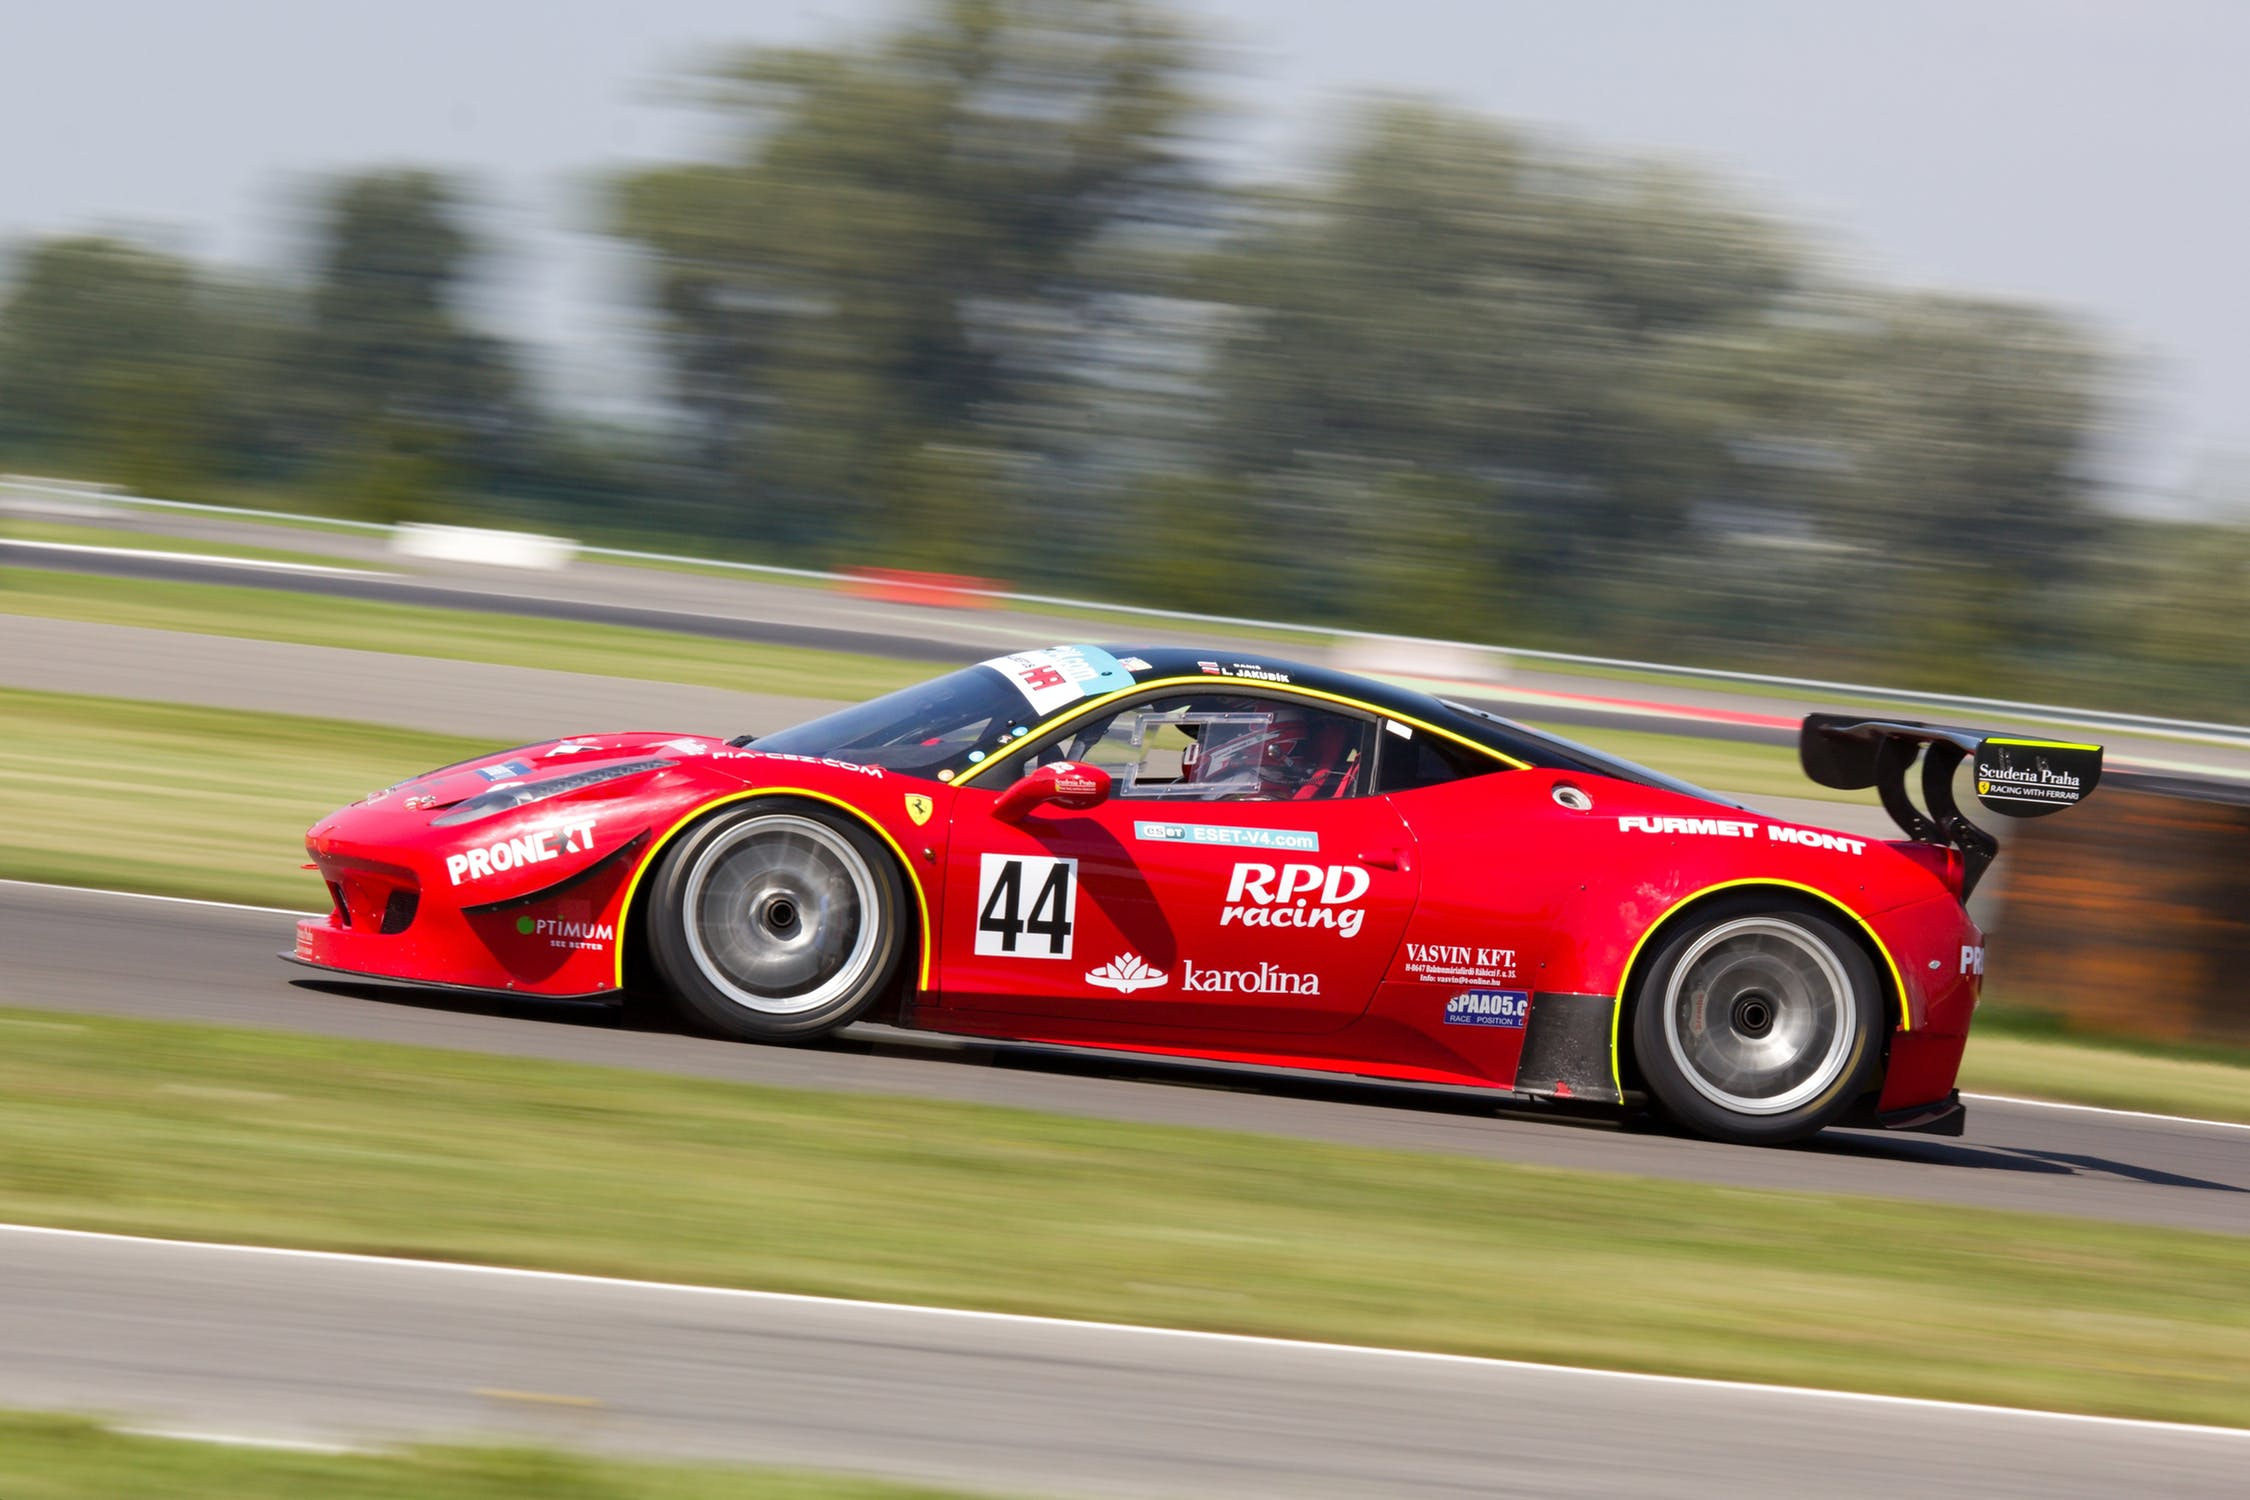

In [38]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [39]:
processed_image = process_img_path('example0.jpg')

img_contains_banana(processed_image)

x.shape after preprocess_input  (1, 224, 224, 3)
shape of predictions  (1, 1000)
('n04037443', 'racer', 0.92562824)
('n04285008', 'sports_car', 0.07028788)
('n04461696', 'tow_truck', 0.0021220406)


False

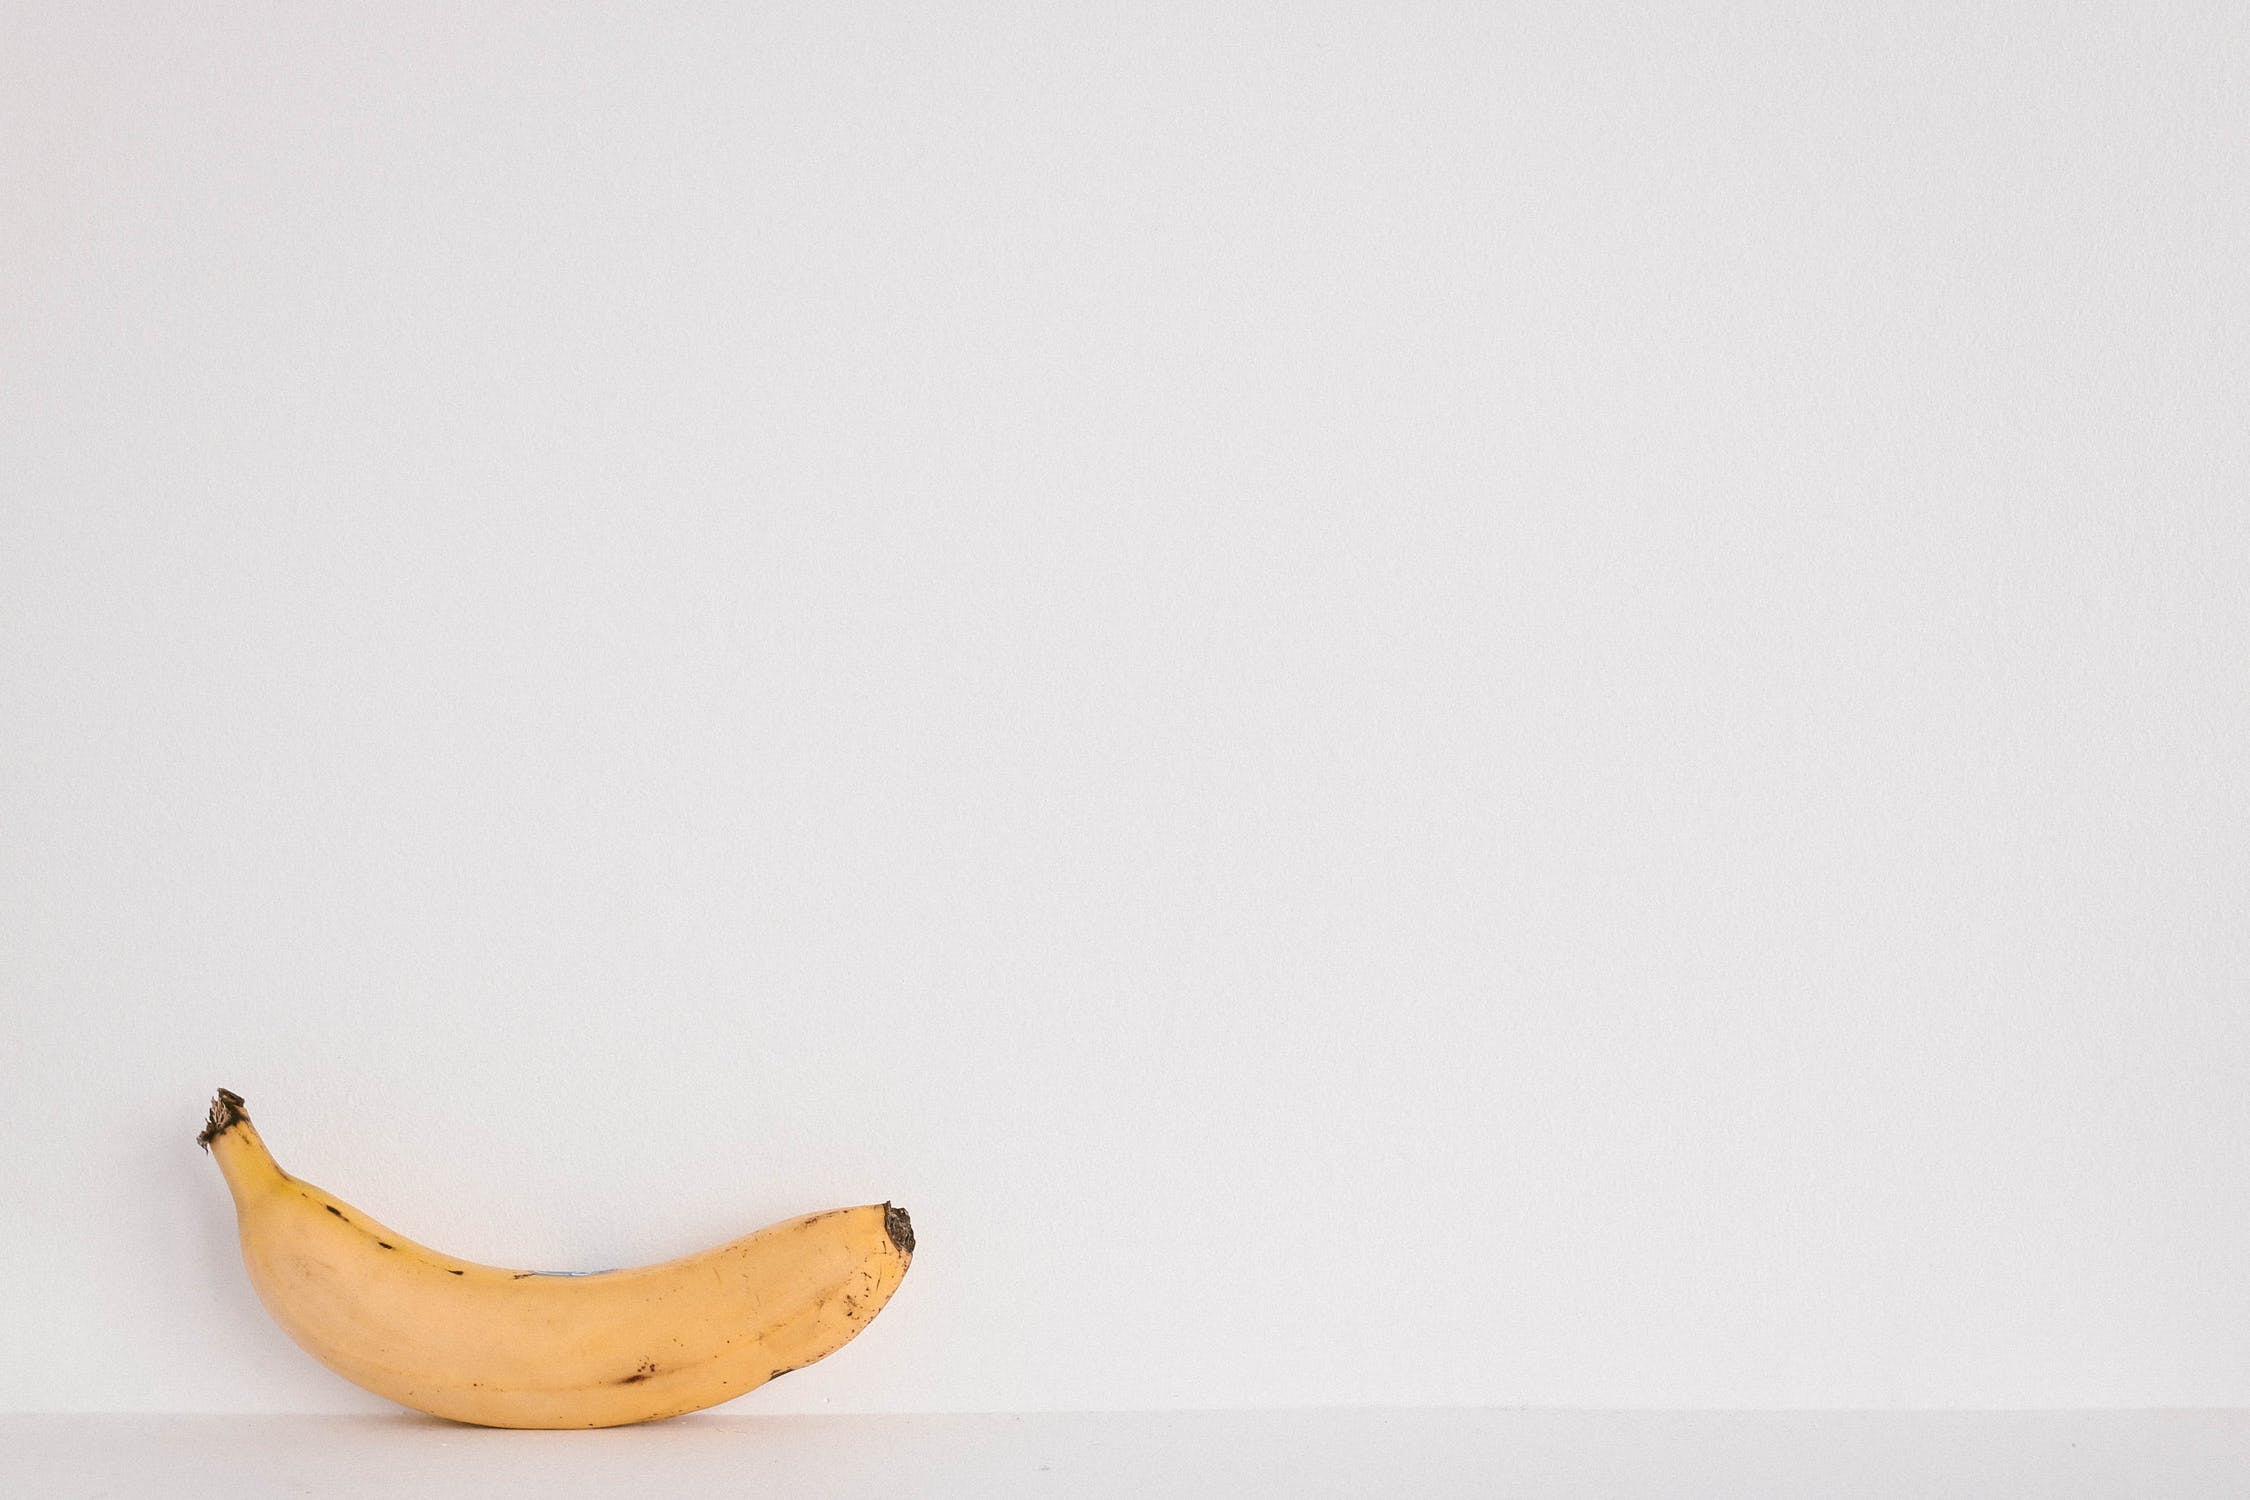

In [41]:
Image(filename='example1.jpg', width=600)

In [42]:
img_contains_banana(process_img_path('example1.jpg'))

x.shape after preprocess_input  (1, 224, 224, 3)
shape of predictions  (1, 1000)
('n03532672', 'hook', 0.077739626)
('n07753592', 'banana', 0.07015057)
('n03498962', 'hatchet', 0.06332093)


True

Notice that, while it gets it right, the confidence for the `banana` classification is only $7\%$, lower than the confidence for `hook`! <br>
That's likely because so much of the image is "not-banana", i.e. white pixels! How can this be improved? <br>
A *bounding box* could be centered on objects of interest, and we could then classify only the contents of the box rather than the entire image.

## Challenge

You will be expected to apply a pretrained model to a classification problem today. 

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is an operation of applying a kernel (or filter) to an image to produce another image called an activation map
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- [Deep Learning](https://www.deeplearningbook.org/) Ian Goodfellow et al.
- [Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow, 2nd. ed.](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow-ebook/dp/B07XGF2G87) by Aurelien Geron
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)

------
# References used during lecture 

[CNN Feature Engineering](https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/1_ZD3ewOfpfsMAjhp4MYFnog-edited.jpg), we learned that each convolutional layer creates new features (feature maps) from the images that are passed into it. This image shows how a CNN learns edges, object parts, and then the entire object, as learned features from previous convolutional layers are passed to subsequent convolutional layers. 

[Webpage from Stanford University CNN class](https://cs231n.github.io/convolutional-networks/) with animation showing how the 3x3 convolution filters (i.e. the weight matrices) are overlapped over the Red, Yellow, and Blue channels of a color image in order to calculate convolutions and how the results are stored in an output volume. 

[Py Image Search](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#:~:text=increase%20when%20necessary.-,kernel_size,(7%2C%207)%20tuples.&text=%2C%20a%202%2Dtuple%20specifying%20the,of%20the%202D%20convolution%20window.), provides an in-depth exploration of each of the Conv2D parameters and how to select specific values for each parameter. 

[Keras Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)  don't forget about the documention for the python package that we are using to build our models!